In [10]:
import pandas as pd
import seaborn as sn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

plt.style.use('ggplot')

In [11]:
df = pd.read_excel(
    io='dataset/Coffee Shop Sales.xlsx',
    engine='openpyxl'
)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [13]:
df.sample(1)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
129878,130215,2023-06-14,15:02:03,1,8,Hell's Kitchen,71,3.75,Bakery,Pastry,Chocolate Croissant


In [14]:
# Defining brand-new column for storing revenue. 
df['revenue'] = df['transaction_qty'] * df['unit_price']

In [15]:
df.sample(1)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue
32706,32763,2023-02-27,09:27:29,2,3,Astoria,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,9.5


## Analysis

### I. What are the top selling product categories by total revenue?

In [18]:
product_categories = df.groupby('product_category') \
                       .agg(total_revenue=('revenue', 'sum')) \
                       .sort_values(by='total_revenue') \
                       .reset_index()

In [19]:
product_categories

,product_category,total_revenue
0,Packaged Chocolate,4407.64
1,Flavours,8408.80
2,Loose Tea,11213.60
3,Branded,13607.00
4,Coffee beans,40085.25
5,Drinking Chocolate,72416.00
6,Bakery,82315.64
7,Tea,196405.95
8,Coffee,269952.45


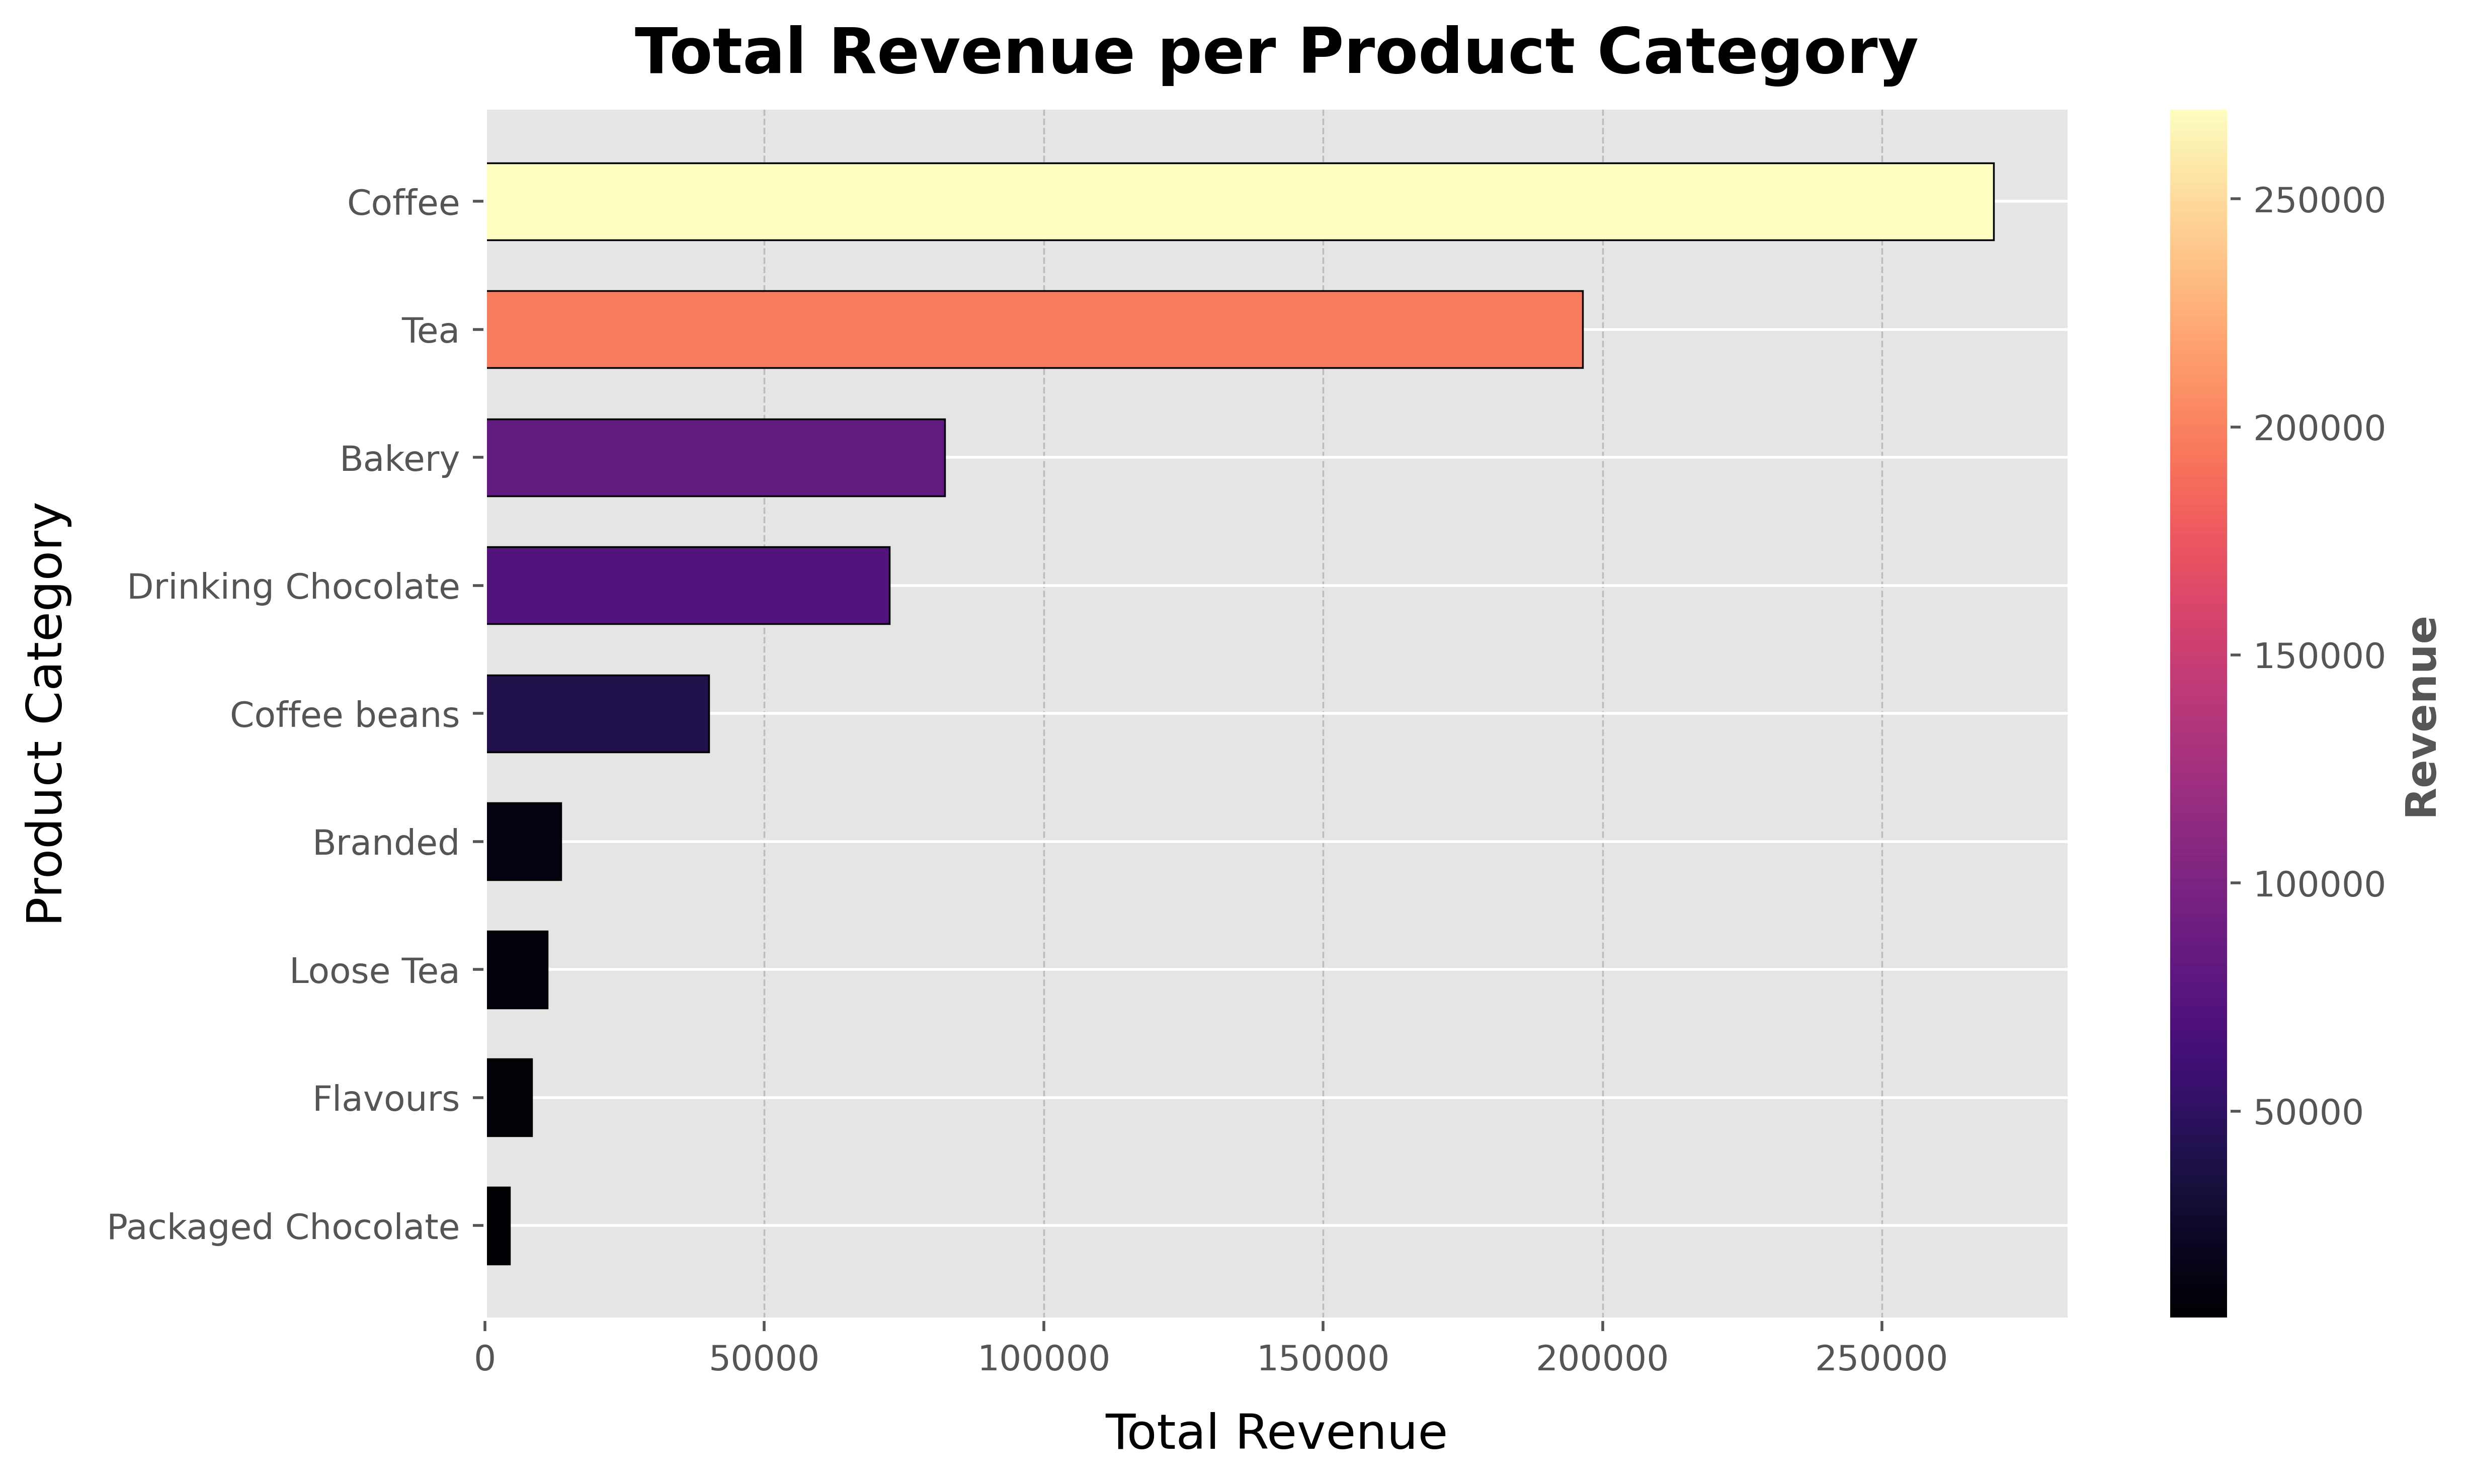

In [25]:
# Normalizing the data for colormap (0 to 1)
norm = mcolors.Normalize(
    vmin=product_categories['total_revenue'].min(),
    vmax=product_categories['total_revenue'].max()
)
cmap = plt.cm.magma
colors = cmap(norm(product_categories['total_revenue']))

fig, ax = plt.subplots(
    figsize=(10, 6),
    dpi=500,
)

ax.barh(
    y=product_categories['product_category'],
    width=product_categories['total_revenue'],
    height=0.6,
    color=colors,
    edgecolor='black'
)

ax.set_title(
    label='Total Revenue per Product Category',
    fontsize=18,
    fontweight='bold',
    color='black',
    loc='center',
    pad=10
)

ax.set_xlabel(
    xlabel='Total Revenue',
    fontsize=14,
    color='black',
    labelpad=10,
    loc='center'
)

ax.set_ylabel(
    ylabel='Product Category',
    fontsize=14,
    color='black',
    labelpad=10,
    loc='center'
)


########### Configuring Grid For Each Axis ###########
ax.xaxis.grid(
    visible=True, 
    which='major', 
    color='gray', 
    linestyle='--', 
    linewidth=0.5, 
    alpha=0.4
)
ax.yaxis.grid(
    visible=True, 
    which='minor', 
    color='gray', 
    linestyle='--', 
    linewidth=0.4, 
    alpha=0.3
)



# Adding colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(
    label='Revenue',
    fontsize=12,
    fontweight='bold'
)

plt.tight_layout()
plt.show()